## Basic Linear Regression Demo

Demonstrates the basic use of the linear regression model from sklearn:

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Simple one-dimensional data prediction.  Basic model and data based upon an example by S. Srinidhi:

[https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204](https://medium.com/@contactsunny/linear-regression-in-python-using-scikit-learn-f0f7b125a204)

In [6]:
# imports and setup
import math
import numpy as np
import pandas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pandas.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

In [7]:
# read and display data-set
data = pandas.read_csv('salaryData.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
# separate out the inputs (x) and outputs (y)
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [9]:
# inputs (x) should be a columnar arrangement, one data-point per row
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [32]:
# outputs (y) is a single array of values, one per row of x
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [69]:
# divide data: 2/3 to train model, 1/3 to test for validation
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3)

In [70]:
xTrain

array([[ 3.7],
       [ 4.1],
       [ 1.3],
       [ 9.5],
       [ 2.2],
       [ 6.8],
       [ 9.6],
       [ 5.1],
       [ 8.2],
       [10.3],
       [ 4.9],
       [ 3.9],
       [ 5.3],
       [ 1.5],
       [ 4.5],
       [ 7.1],
       [ 9. ],
       [ 6. ],
       [ 2.9],
       [ 4. ]])

In [71]:
# build the basic linear model, fit to the training data;
# finds min-error coefficient for x
linearRegression = LinearRegression()
linearRegression.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# the predictions the model makes on input sets; 
# compare predictions on yTrain to correct values, above
yTestPredict = linearRegression.predict(xTest)
yTrainPredict = linearRegression.predict(xTrain)
xTrain

array([[ 3.7],
       [ 4.1],
       [ 1.3],
       [ 9.5],
       [ 2.2],
       [ 6.8],
       [ 9.6],
       [ 5.1],
       [ 8.2],
       [10.3],
       [ 4.9],
       [ 3.9],
       [ 5.3],
       [ 1.5],
       [ 4.5],
       [ 7.1],
       [ 9. ],
       [ 6. ],
       [ 2.9],
       [ 4. ]])

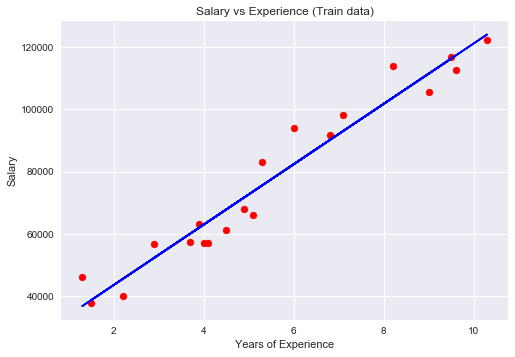

In [74]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')
plt.plot(xTrain, yTrainPredict, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [75]:
# overall squared error on training, normalized to maximum salary (y-value)
mean_squared_error(yTrain, yTrainPredict) / max(y)

299.05501725322085

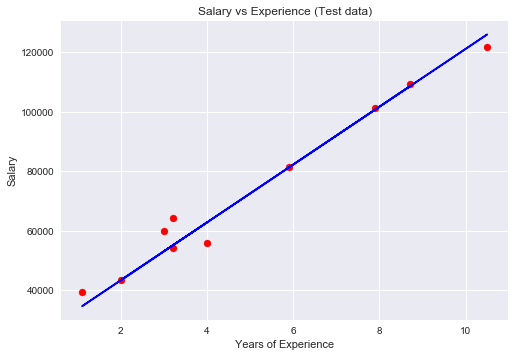

In [76]:
# plot predicted line for test data
plt.scatter(xTest, yTest, color='red')
plt.plot(xTest, yTestPredict, color='blue')
plt.title('Salary vs Experience (Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [77]:
# overall squared error on testing, normalized to maximum salary (y-value);
# will *generally* be somewhat larger than training error, but should be close
# and *can* be less
mean_squared_error(yTest, yTestPredict) / max(y)

184.85311129831632

### Building a higher-order polynomial regression

We can modify our input data features to increase their dimensionality.  One way to do this is to use the `PolynomialFeatures` libary, which can transform data by adding higher-degree polynomial values for each input point.

In [78]:
# for proper plots of the higher-order values, it is necessary to first sort
# the data by the original x-component (ensuring that the matching y-values
# are sorted accordingly, as well)
import operator
sorted_zip = sorted(zip(xTrain, yTrain), key=operator.itemgetter(0))
xTrain, yTrain = zip(*sorted_zip)
xTrain

(array([1.3]),
 array([1.5]),
 array([2.2]),
 array([2.9]),
 array([3.7]),
 array([3.9]),
 array([4.]),
 array([4.1]),
 array([4.5]),
 array([4.9]),
 array([5.1]),
 array([5.3]),
 array([6.]),
 array([6.8]),
 array([7.1]),
 array([8.2]),
 array([9.]),
 array([9.5]),
 array([9.6]),
 array([10.3]))

In [38]:
# the basic degree-2 transform adds the square of the data to the original
# (along with a bias vector of 1's for the 0th weight)
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
xTrain2 = poly2.fit_transform(xTrain)
xTrain2.shape

(20, 3)

In [34]:
linearRegression2 = LinearRegression()
linearRegression2.fit(xTrain2, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
yTrainPredict2 = linearRegression2.predict(xTrain2)
yTrainPredict2.shape

(20,)

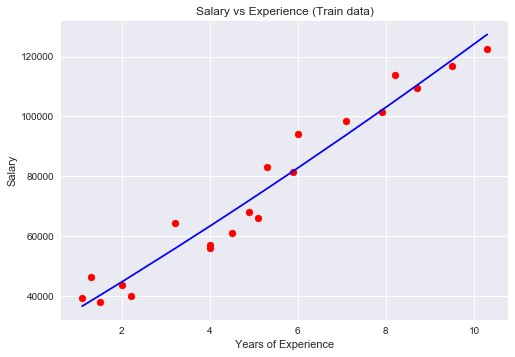

In [46]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict2, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [47]:
# while the order-2 polynomial doesn't make much difference here,
# we can now extend things to include even higher-order terms
poly3 = PolynomialFeatures(degree=3)
xTrain3 = poly3.fit_transform(xTrain)
linearRegression3 = LinearRegression()
linearRegression3.fit(xTrain3, yTrain)
yTrainPredict3 = linearRegression3.predict(xTrain3)

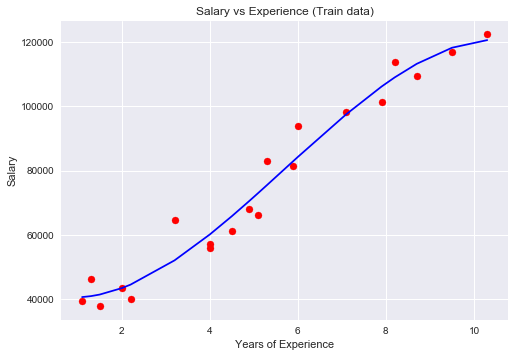

In [48]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict3, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [49]:
# while the order-2 polynomial doesn't make much difference here,
# we can now extend things to include even higher-order terms
poly10 = PolynomialFeatures(degree=10)
xTrain10 = poly10.fit_transform(xTrain)
linearRegression10 = LinearRegression()
linearRegression10.fit(xTrain10, yTrain)
yTrainPredict10 = linearRegression10.predict(xTrain10)

In [61]:
len(yTrain)

20

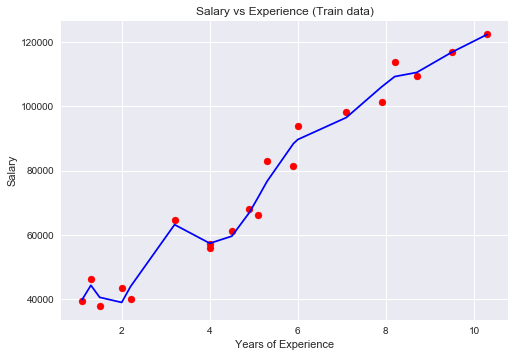

In [53]:
# plot predicted line for training set
plt.scatter(xTrain, yTrain, color='red')

plt.plot(xTrain, yTrainPredict10, color='blue')
plt.title('Salary vs Experience (Train data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [56]:
yTrainPredict10.shape

(20,)

In [64]:
xTrain

(array([1.1]),
 array([1.3]),
 array([1.5]),
 array([2.]),
 array([2.2]),
 array([3.2]),
 array([4.]),
 array([4.]),
 array([4.5]),
 array([4.9]),
 array([5.1]),
 array([5.3]),
 array([5.9]),
 array([6.]),
 array([7.1]),
 array([7.9]),
 array([8.2]),
 array([8.7]),
 array([9.5]),
 array([10.3]))